In [28]:
import yfinance as yf
import talib
import pandas as pd

# Descargar los datos del S&P 500
ticker = "^GSPC"
data = yf.download(ticker, start="2000-01-01", end="2024-01-01")
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [30]:
# Calcular los retornos diarios
data['Returns'] = data['Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090


In [31]:
data['Previous_Return'] = data['Returns'].shift(-1)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,-0.038345
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190


In [32]:
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return
Date,,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011190,-0.013063


<Axes: xlabel='Date'>

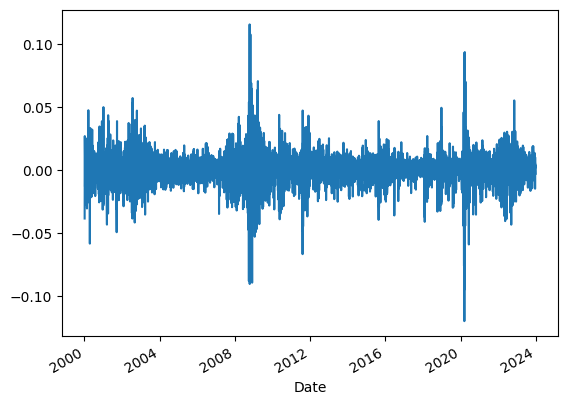

In [10]:
data['Returns'].plot()

<Axes: >

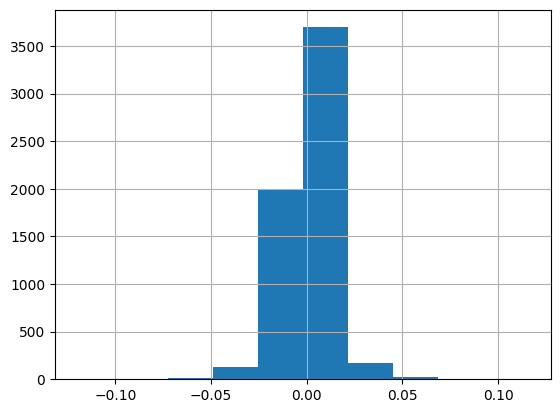

In [13]:
data['Returns'].hist()

In [14]:
data['Returns'].describe()

count    6036.000000
mean        0.000273
std         0.012360
min        -0.119841
25%        -0.004873
50%         0.000588
75%         0.005937
max         0.115800
Name: Returns, dtype: float64

In [33]:
data['Returns_cat'] = (data['Previous_Return'] > 0.000588).astype(int)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return,Returns_cat
Date,,,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922,1
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956,1
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090,1
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190,1
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011190,-0.013063,0


In [34]:
# Calcular los indicadores técnicos
data['PLUS_DM'], data['MINUS_DM'] = talib.PLUS_DM(data['High'], data['Low']), talib.MINUS_DM(data['High'], data['Low'])
data['PLUS_DI'], data['MINUS_DI'] = talib.PLUS_DI(data['High'], data['Low'], data['Close']), talib.MINUS_DI(data['High'], data['Low'], data['Close'])
data['DX'] = talib.DX(data['High'], data['Low'], data['Close'])
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'])
data['ADXR'] = talib.ADXR(data['High'], data['Low'], data['Close'])
data['APO'] = talib.APO(data['Close'])
data['PPO'] = talib.PPO(data['Close'])
data['AROON_UP'], data['AROON_DOWN'] = talib.AROON(data['High'], data['Low'])
data['AROONOSC'] = talib.AROONOSC(data['High'], data['Low'])
data['BOP'] = talib.BOP(data['Open'], data['High'], data['Low'], data['Close'])
data['CCI'] = talib.CCI(data['High'], data['Low'], data['Close'])
data['CMO'] = talib.CMO(data['Close'])
data['MACD'], data['MACD_SIGNAL'], data['MACD_HIST'] = talib.MACD(data['Close'])
data['MFI'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'])
data['MOM'] = talib.MOM(data['Close'])
data['RSI'] = talib.RSI(data['Close'])
data['STOCH_SLOWK'], data['STOCH_SLOWD'] = talib.STOCH(data['High'], data['Low'], data['Close'])
data['ULTOSC'] = talib.ULTOSC(data['High'], data['Low'], data['Close'])
data['WILLR'] = talib.WILLR(data['High'], data['Low'], data['Close'])

data.dropna(inplace=True)

# Mostrar las primeras filas del DataFrame con los indicadores
data.head()


,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return,Returns_cat,PLUS_DM,...,MACD,MACD_SIGNAL,MACD_HIST,MFI,MOM,RSI,STOCH_SLOWK,STOCH_SLOWD,ULTOSC,WILLR
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-02,1379.189941,1386.560059,1370.349976,1381.760010,1381.760010,1198600000,0.001863,0.019837,1,62.156615,...,-15.511020,-17.821815,2.310795,44.969506,-5.910034,49.990387,92.229426,73.568433,55.534039,-38.219205
2000-03-03,1381.760010,1410.880005,1381.760010,1409.170044,1409.170044,1150300000,0.019837,-0.012695,0,82.036803,...,-11.298807,-16.517214,5.218407,52.302202,20.910034,56.812397,94.296044,88.343600,60.571272,-1.992728
2000-03-06,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000,-0.012695,-0.025631,0,76.177031,...,-9.297002,-15.073171,5.776169,51.933285,45.190063,51.841631,86.335263,90.953578,56.213873,-22.841117
2000-03-07,1391.280029,1399.209961,1349.989990,1355.619995,1355.619995,1314100000,-0.025631,0.008173,1,70.735815,...,-10.467363,-14.152010,3.684647,44.104635,3.449951,43.644443,58.686063,79.772456,51.386710,-64.398056
2000-03-08,1355.619995,1373.790039,1346.619995,1366.699951,1366.699951,1203000000,0.008173,0.025602,1,65.683257,...,-10.381155,-13.397839,3.016684,43.653110,6.010010,46.476312,36.432966,60.484764,52.985838,-51.485868


In [ ]:
# Guardar los datos en un archivo CSV
data.to_csv('sp500_technical_indicators.csv')